<a href="https://colab.research.google.com/github/nakaroov/-ENEM/blob/main/SampleBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas Usadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np #cálculos em Arrays Multidimensionais

# DATABASE

In [83]:
ENEM = pd.read_excel('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_0.xlsx')
NOTAS = pd.read_excel('/content/drive/My Drive/ENEM_QUESTOES_DADOS/REDENEM2019_0.xlsx')
ENEMSOCIO = pd.read_excel('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_0_Socio.xlsx')

In [190]:
ENEM.columns.values

array(['NU_ANO', 'MUNICIPIO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'LOCALPROVA', 'Q003', 'Q004', 'Q006', 'Q024',
       'Q025', 'CARRO'], dtype=object)

In [85]:
NOTAS.columns.values

array(['NU_ANO', 'NO_MUNICIPIO_RESIDENCIA', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'],
      dtype=object)

# AJUSTES

In [86]:
ENEM = ENEM.rename(columns={'NO_MUNICIPIO_RESIDENCIA': 'MUNICIPIO'})
NOTAS = NOTAS.rename(columns={'NO_MUNICIPIO_RESIDENCIA': 'MUNICIPIO'})
ENEM["MUNICIPIO"]= ENEM["MUNICIPIO"].str.upper()
NOTAS["MUNICIPIO"]= NOTAS["MUNICIPIO"].str.upper()
ENEM = ENEM.fillna(0)
NOTAS = NOTAS.fillna(0)

In [87]:
def corrigir_nomes(nome):
    nome = nome.replace('Í', 'I').replace('Ç', 'C').replace('Õ', 'O').replace('É', 'E').replace('Ã', 
    'A').replace('Ó', 'O').replace('Ê', 'E').replace('Á', 'A').replace('Ú', 'U').replace('Â',
    'A').replace('Ô', 'O')
    return nome

In [88]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC"]
criterios = ["NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]
liguagens = ["NU_NOTA_LC", "TP_LINGUA"]

In [89]:
# ENEM = ENEM.drop(columns =["TP_ENSINO", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU"])
NOTAS = NOTAS.drop(columns = ["MUNICIPIO", "NU_ANO"])

In [90]:
ENEM = ENEM.join(NOTAS)
ENEM = ENEM.join(ENEMSOCIO)

In [91]:
ENEM['MUNICIPIO'] = ENEM['MUNICIPIO'].apply(corrigir_nomes)

In [92]:
ENEM["NO_MUNICIPIO_PROVA"]= ENEM["NO_MUNICIPIO_PROVA"].str.upper()
ENEM = ENEM.rename(columns={'NO_MUNICIPIO_PROVA': 'LOCALPROVA'})
ENEM['LOCALPROVA'] = ENEM['LOCALPROVA'].apply(corrigir_nomes)
ENEM

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q010,Q011,Q024,Q025
0,2019,NOVA MUTUM,51,MT,22,F,3,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOVA MUTUM,B,B,C,A,B,B,B
1,2019,CUIABA,51,MT,18,F,4,2,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CUIABA,F,F,B,A,A,A,A
2,2019,CACERES,51,MT,26,F,2,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACERES,A,A,B,A,B,A,A
3,2019,SINOP,51,MT,23,M,3,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SINOP,A,B,C,A,B,B,B
4,2019,AGUA BOA,51,MT,16,F,1,1,1,1,1,1,5225,6097,5791,5716,0,1.0,720.0,140.0,120.0,160.0,180.0,120.0,AGUA BOA,C,E,F,C,A,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019,CATU,29,BA,24,F,3,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CATU,F,B,C,A,A,A,B
999996,2019,SALVADOR,29,BA,37,F,2,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SALVADOR,F,F,B,A,A,A,B
999997,2019,ESPLANADA,29,BA,17,M,3,3,1,1,1,1,6037,6175,5792,6844,0,1.0,720.0,160.0,140.0,140.0,160.0,120.0,ESPLANADA,E,D,L,B,A,C,B
999998,2019,ITAJUIPE,29,BA,17,F,1,2,1,1,1,1,4146,4824,4435,5713,0,1.0,820.0,160.0,200.0,160.0,180.0,120.0,ITAJUIPE,B,C,B,B,A,A,A


# Nova seção

In [93]:
for index in ENEM:
  index = ENEM.loc[(ENEM['NU_NOTA_LC'] < 1000),  'NU_NOTA_LC'] = ENEM['NU_NOTA_LC']*10
  index = ENEM.loc[(ENEM['NU_NOTA_CH'] < 1000),  'NU_NOTA_CH'] = ENEM['NU_NOTA_CH']*10
  index = ENEM.loc[(ENEM['NU_NOTA_MT'] < 1000),  'NU_NOTA_MT'] = ENEM['NU_NOTA_MT']*10
  index = ENEM.loc[(ENEM['NU_NOTA_CN'] < 1000),  'NU_NOTA_CN'] = ENEM['NU_NOTA_CN']*10

In [94]:
tem_carro_moto = {
    'A': 0,
    'B': 1,
    'C': 1,
    'D': 1,
    'E': 1 }

In [95]:
ENEM['Q010'] = [tem_carro_moto[resposta] for resposta in ENEM.Q010]
ENEM['Q011'] = [tem_carro_moto[resposta] for resposta in ENEM.Q011]
ENEM['CARRO'] = ENEM['Q011'] + ENEM['Q010']
ENEM['CARRO']  = ENEM['CARRO'] .replace({2: 1})

LIMPAR MEMORIA

In [96]:
def Memoria(data):
  data['NU_NOTA_CN'] =  data['NU_NOTA_CN'].astype("int16")
  data['NU_NOTA_CH'] =  data['NU_NOTA_CH'].astype("int16")
  data['NU_NOTA_LC'] =  data['NU_NOTA_LC'].astype("int16")
  data['NU_NOTA_MT'] =  data['NU_NOTA_MT'].astype("int16")
  data['NU_ANO'] =  data['NU_ANO'].astype("int16")
  data['MUNICIPIO'] =  data['MUNICIPIO'].astype("category")
  data['LOCALPROVA'] =  data['LOCALPROVA'].astype("category")
  data['TP_SEXO'] =  data['TP_SEXO'].astype("category")
  data['SG_UF_RESIDENCIA'] =  data['SG_UF_RESIDENCIA'].astype("category")
  data.info(verbose=False, memory_usage="deep")
  return (data)

In [97]:
Memoria(ENEM)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 33 entries, NU_ANO to CARRO
dtypes: category(4), float64(7), int16(5), int64(12), object(5)
memory usage: 475.6 MB


,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q010,Q011,Q024,Q025,CARRO
0,2019,NOVA MUTUM,51,MT,22,F,3,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOVA MUTUM,B,B,C,0,1,B,B,1
1,2019,CUIABA,51,MT,18,F,4,2,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CUIABA,F,F,B,0,0,A,A,0
2,2019,CACERES,51,MT,26,F,2,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACERES,A,A,B,0,1,A,A,1
3,2019,SINOP,51,MT,23,M,3,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SINOP,A,B,C,0,1,B,B,1
4,2019,AGUA BOA,51,MT,16,F,1,1,1,1,1,1,5225,6097,5791,5716,0,1.0,720.0,140.0,120.0,160.0,180.0,120.0,AGUA BOA,C,E,F,1,0,C,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019,CATU,29,BA,24,F,3,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CATU,F,B,C,0,0,A,B,0
999996,2019,SALVADOR,29,BA,37,F,2,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SALVADOR,F,F,B,0,0,A,B,0
999997,2019,ESPLANADA,29,BA,17,M,3,3,1,1,1,1,6037,6175,5792,6844,0,1.0,720.0,160.0,140.0,140.0,160.0,120.0,ESPLANADA,E,D,L,1,0,C,B,1
999998,2019,ITAJUIPE,29,BA,17,F,1,2,1,1,1,1,4146,4824,4435,5713,0,1.0,820.0,160.0,200.0,160.0,180.0,120.0,ITAJUIPE,B,C,B,1,0,A,A,1


Classes Sociais por Faixas de Salário-Mínimo (IBGE) <br>
Classe	Número de Salários-Mínimo (SM)	Renda Familiar (R$)  em 2020


A	Acima de 20 SM 20.900,01 ou mais

B	De 10 a 20 SM 10.450,01   a   R$ 20.900,00

C	De 4 a 10 SM 4.180,01 a 10.450,00 

D	De 2 a 4 SM	2.090,01 a 4.180,00  

E	Até 2 SM	Até  2.090,00 




In [193]:
#Q006 = Renda familiar de A a Q quanto maior mais alta a renda 
renda_familiar = {
    "A"	: "E",
    "B": 	"E",
    "C":	"E",
    "D":	"E",
    "E":	"D",
    "F":	"D",
    "G":	"D",
    "H":	"C",
    "I":  "C",
    "J":	"C",
    "K":	"C",
    "L":	"C",
    "M":  "C",
    "N":	"B",
    "O":	"B",
    "P":  "B",
    "Q": 	"A"
}

In [194]:
#inserindo antes da idade
ENEM.insert(6, 'NU_RENDA_FAMILIAR', ENEM.Q006.replace(renda_familiar))

In [98]:
ENEM = ENEM.drop(columns=["Q010", "Q011"])
ENEM2 = ENEM.copy()

In [99]:
ENEM["SOMA"] = ENEM["NU_NOTA_CN"] + ENEM["NU_NOTA_CH"] + ENEM["NU_NOTA_MT"] + ENEM["NU_NOTA_LC"] 
ENEM.query("SOMA<=0")
ENEM.drop(ENEM[ENEM['SOMA']  < 1].index, inplace = True) 
ENEM.drop(ENEM[ENEM['NU_NOTA_REDACAO']  < 100].index, inplace = True) 
ENEM = ENEM.drop(columns=["SOMA"])

In [100]:
ENEM.drop(ENEM[ENEM['NU_NOTA_CN']  < 10].index, inplace = True) 
ENEM.drop(ENEM[ENEM['NU_NOTA_CH']  < 10].index, inplace = True) 
ENEM.drop(ENEM[ENEM['NU_NOTA_MT']  < 10].index, inplace = True) 
ENEM.drop(ENEM[ENEM['NU_NOTA_LC']  < 10].index, inplace = True) 

In [101]:
 ENEM = ENEM.iloc[0:500000]
 NOTAS = NOTAS.iloc[0:500000]

In [102]:
ENEM.reset_index(drop=True)

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO
0,2019,AGUA BOA,51,MT,16,F,1,1,1,1,1,1,5225,6097,5791,5716,0,1.0,720.0,140.0,120.0,160.0,180.0,120.0,AGUA BOA,C,E,F,C,B,1
1,2019,RONDONOPOLIS,51,MT,18,F,3,2,1,1,1,1,4829,5558,5539,4842,0,1.0,800.0,140.0,180.0,160.0,180.0,140.0,RONDONOPOLIS,D,C,G,C,B,1
2,2019,SINOP,51,MT,19,M,1,1,1,1,1,1,4704,5075,4487,7503,1,1.0,360.0,120.0,40.0,40.0,120.0,40.0,SINOP,E,D,I,B,B,0
3,2019,RONDONOPOLIS,51,MT,41,F,1,1,1,1,1,1,4402,5154,4866,4397,0,1.0,560.0,100.0,120.0,100.0,140.0,100.0,RONDONOPOLIS,B,B,A,B,B,0
4,2019,CUIABA,51,MT,18,M,2,1,1,1,1,1,3489,5484,4711,3663,1,1.0,540.0,120.0,100.0,80.0,120.0,120.0,CUIABA,B,B,C,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2019,SAO PAULO,35,SP,20,F,3,1,1,1,1,1,3785,5313,5472,4043,0,1.0,640.0,140.0,120.0,140.0,140.0,100.0,SAO PAULO,F,F,F,A,B,0
499996,2019,SAO PAULO,35,SP,17,M,3,2,1,1,1,1,4893,4702,5169,5728,1,1.0,600.0,120.0,120.0,100.0,120.0,140.0,SAO PAULO,D,C,D,B,B,0
499997,2019,SAO PAULO,35,SP,19,F,1,1,1,1,1,1,5472,5802,5808,6045,0,1.0,780.0,140.0,200.0,160.0,180.0,100.0,SAO PAULO,D,F,H,E,B,1
499998,2019,MAUA,35,SP,20,F,1,1,1,1,1,1,5345,5296,5529,4733,1,1.0,600.0,160.0,120.0,140.0,120.0,60.0,MAUA,C,F,E,B,B,1


In [197]:
ENEM

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_RENDA_FAMILIAR,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO
4,2019,AGUA BOA,51,MT,16,F,D,1,1,1,1,1,1,5225,6097,5791,5716,0,1.0,720.0,140.0,120.0,160.0,180.0,120.0,AGUA BOA,C,E,F,C,B,1
5,2019,RONDONOPOLIS,51,MT,18,F,D,3,2,1,1,1,1,4829,5558,5539,4842,0,1.0,800.0,140.0,180.0,160.0,180.0,140.0,RONDONOPOLIS,D,C,G,C,B,1
7,2019,SINOP,51,MT,19,M,C,1,1,1,1,1,1,4704,5075,4487,7503,1,1.0,360.0,120.0,40.0,40.0,120.0,40.0,SINOP,E,D,I,B,B,0
8,2019,RONDONOPOLIS,51,MT,41,F,E,1,1,1,1,1,1,4402,5154,4866,4397,0,1.0,560.0,100.0,120.0,100.0,140.0,100.0,RONDONOPOLIS,B,B,A,B,B,0
9,2019,CUIABA,51,MT,18,M,E,2,1,1,1,1,1,3489,5484,4711,3663,1,1.0,540.0,120.0,100.0,80.0,120.0,120.0,CUIABA,B,B,C,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692486,2019,SAO PAULO,35,SP,20,F,D,3,1,1,1,1,1,3785,5313,5472,4043,0,1.0,640.0,140.0,120.0,140.0,140.0,100.0,SAO PAULO,F,F,F,A,B,0
692487,2019,SAO PAULO,35,SP,17,M,E,3,2,1,1,1,1,4893,4702,5169,5728,1,1.0,600.0,120.0,120.0,100.0,120.0,140.0,SAO PAULO,D,C,D,B,B,0
692488,2019,SAO PAULO,35,SP,19,F,C,1,1,1,1,1,1,5472,5802,5808,6045,0,1.0,780.0,140.0,200.0,160.0,180.0,100.0,SAO PAULO,D,F,H,E,B,1
692489,2019,MAUA,35,SP,20,F,D,1,1,1,1,1,1,5345,5296,5529,4733,1,1.0,600.0,160.0,120.0,140.0,120.0,60.0,MAUA,C,F,E,B,B,1


In [104]:
ENEM2

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO
0,2019,NOVA MUTUM,51,MT,22,F,3,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOVA MUTUM,B,B,C,B,B,1
1,2019,CUIABA,51,MT,18,F,4,2,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CUIABA,F,F,B,A,A,0
2,2019,CACERES,51,MT,26,F,2,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACERES,A,A,B,A,A,1
3,2019,SINOP,51,MT,23,M,3,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SINOP,A,B,C,B,B,1
4,2019,AGUA BOA,51,MT,16,F,1,1,1,1,1,1,5225,6097,5791,5716,0,1.0,720.0,140.0,120.0,160.0,180.0,120.0,AGUA BOA,C,E,F,C,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019,CATU,29,BA,24,F,3,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CATU,F,B,C,A,B,0
999996,2019,SALVADOR,29,BA,37,F,2,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SALVADOR,F,F,B,A,B,0
999997,2019,ESPLANADA,29,BA,17,M,3,3,1,1,1,1,6037,6175,5792,6844,0,1.0,720.0,160.0,140.0,140.0,160.0,120.0,ESPLANADA,E,D,L,C,B,1
999998,2019,ITAJUIPE,29,BA,17,F,1,2,1,1,1,1,4146,4824,4435,5713,0,1.0,820.0,160.0,200.0,160.0,180.0,120.0,ITAJUIPE,B,C,B,A,A,1


In [105]:
ENEM[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,4768.185414,5087.070382,5209.288892,5210.409912
std,763.042534,798.923006,1090.822255,622.909169
min,3279.000000,3159.000000,3590.000000,3220.000000
25%,4165.000000,4493.000000,4333.000000,4835.000000
50%,4683.000000,5108.000000,4973.000000,5258.000000
75%,5317.000000,5667.000000,5941.000000,5651.000000
max,8497.000000,8351.000000,9850.000000,8017.000000


# SALVAR

In [112]:
ENEM.to_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_2S.csv' ,index=False)

In [113]:
ENEM2.to_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_2.csv' ,index=False)

In [27]:
ENEM0.to_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2017.csv' ,index=False)

NameError: ignored

In [ ]:
E0.to_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019S.csv' ,index=False)

# CARREGAR CSV

In [116]:
ENEM0 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_0.csv')
ENEM1 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_1.csv')
ENEM2 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_2.csv')
ENEM3 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_3.csv')
ENEM4 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_4.csv')
# ENEM5 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2017_5.csv')
# ENEM6 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2017_6.csv')

In [117]:
E0 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_0S.csv')
E1 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_1S.csv')
E2 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_2S.csv')
E3 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_3S.csv')
E4 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2019_4S.csv')
# E5 = pd.read_csv('/content/drive/My Drive/ENEM_QUESTOES_DADOS/ENEM2017_5S.csv')

In [119]:
ENEM0 = ENEM0.append(ENEM1)
ENEM0 = ENEM0.append(ENEM2)
ENEM0 = ENEM0.append(ENEM3)
ENEM0 = ENEM0.append(ENEM4)
ENEM0 = ENEM0.append(ENEM5)
ENEM0 = ENEM0.append(ENEM6)

NameError: ignored

In [ ]:
E0 = E0.append(E1)
E0 = E0.append(E2)
E0 = E0.append(E3)
E0 = E0.append(E4)
E0 = E0.append(E5)



# GRAFICOS NACIONAL

Text(0.5, 1.0, 'Quantidade de Alunos por idade')

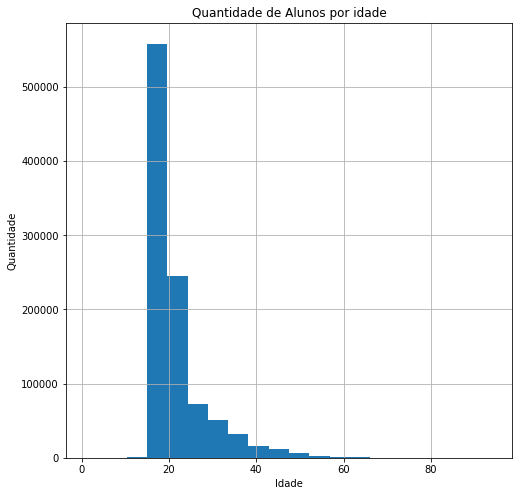

In [ ]:
ENEM0["NU_IDADE"].hist(bins = 20, figsize = (8,8))
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Quantidade de Alunos por idade")

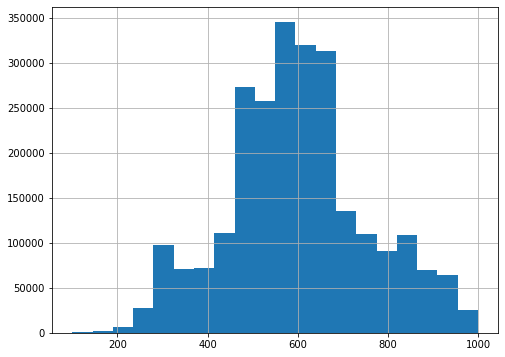

In [ ]:
E0["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

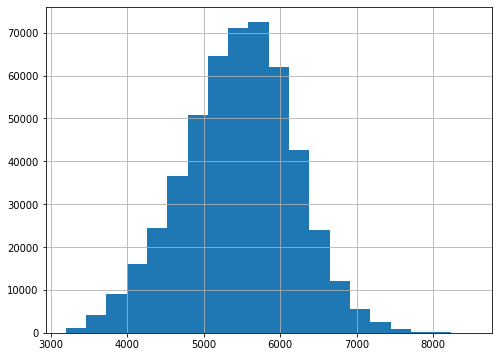

In [ ]:
E0["NU_NOTA_CH"].hist(bins = 20, figsize=(8, 6))

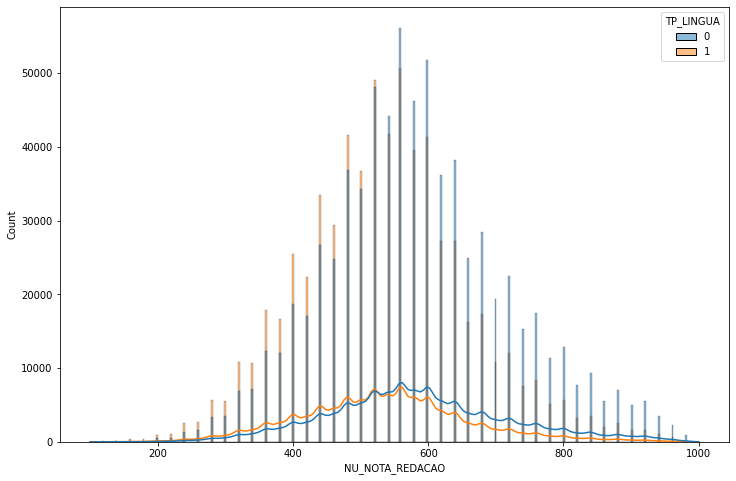

In [ ]:
info = ENEM0.query("TP_ESCOLA >1")
plt.figure(figsize=(12,8))
sns.histplot(info, x = "NU_NOTA_REDACAO", hue="TP_LINGUA", kde=True)

In [ ]:
ENEM0.CARRO.value_counts()

0    508378
1    491622
Name: CARRO, dtype: int64

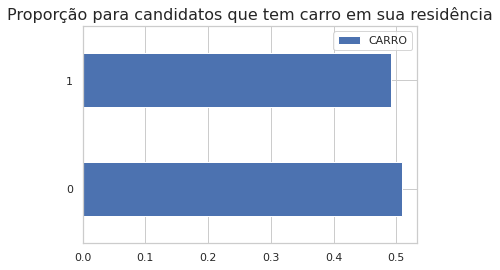

In [ ]:
carros_enem_terounao = pd.DataFrame(ENEM0['CARRO'].value_counts(normalize = True))
carros_enem_terounao.plot.barh().set_title('Proporção para candidatos que tem carro em sua residência', fontsize = 16);

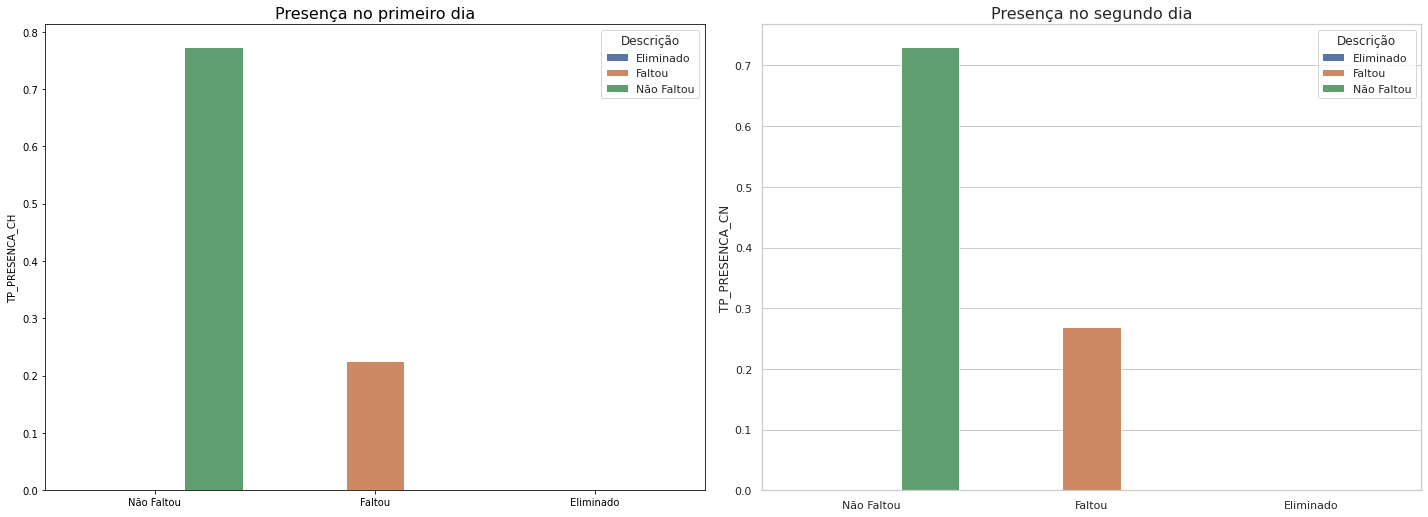

In [ ]:
sem_carro = ENEM0.loc[ENEM0['CARRO'] == 0]
nao_carro = pd.DataFrame(sem_carro['TP_PRESENCA_CN'].value_counts(normalize=True))
nao_carroH = pd.DataFrame(sem_carro['TP_PRESENCA_CH'].value_counts(normalize=True))


plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=nao_carroH, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=nao_carroH['TP_PRESENCA_CH'], hue='TP_PRESENCA_CH',
                 )
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no primeiro dia', fontsize = 16)

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=nao_carro, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=nao_carro['TP_PRESENCA_CN'], hue='TP_PRESENCA_CN',
                 )
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no segundo dia', fontsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
nao_carroH

,TP_PRESENCA_CH
1,0.774052
0,0.225299
2,0.000649


CORRELAÇAO

In [ ]:
correlacao =  E0[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
NU_NOTA_CN,1.000000,0.639661,0.626914,0.572131
NU_NOTA_CH,0.639661,1.000000,0.557869,0.703511
NU_NOTA_MT,0.626914,0.557869,1.000000,0.503379
NU_NOTA_LC,0.572131,0.703511,0.503379,1.000000


In [ ]:
corredacao =  E0[criterios].corr()
corredacao

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_COMP1,1.000000,0.668760,0.680173,0.754405,0.522574
NU_NOTA_COMP2,0.668760,1.000000,0.841869,0.757777,0.639943
NU_NOTA_COMP3,0.680173,0.841869,1.000000,0.781427,0.648442
NU_NOTA_COMP4,0.754405,0.757777,0.781427,1.000000,0.620413
NU_NOTA_COMP5,0.522574,0.639943,0.648442,0.620413,1.000000


# GRAFICOS - CIDADE

In [155]:
CITY = []
CITY.append(ENEM0.query("MUNICIPIO == 'MOCOCA'"))
CITY.append(ENEM0.query("MUNICIPIO == 'RIBEIRAO PRETO'"))
CITY.append(ENEM0.query("MUNICIPIO == 'SAO PAULO'"))


Text(0.5, 1.0, 'Quantidade de Alunos por idade - MOCOCA')

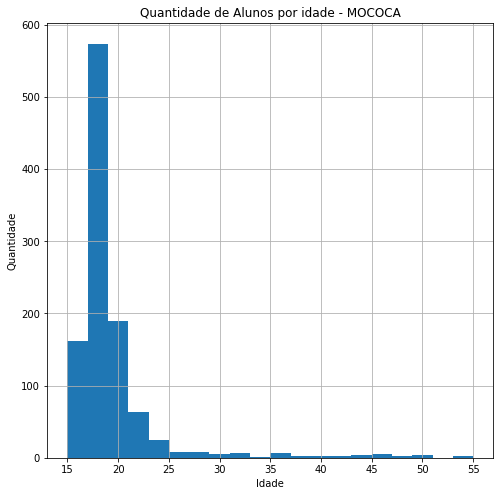

In [156]:
CITY[0]["NU_IDADE"].hist(bins = 20, figsize = (8,8))
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Quantidade de Alunos por idade - MOCOCA")

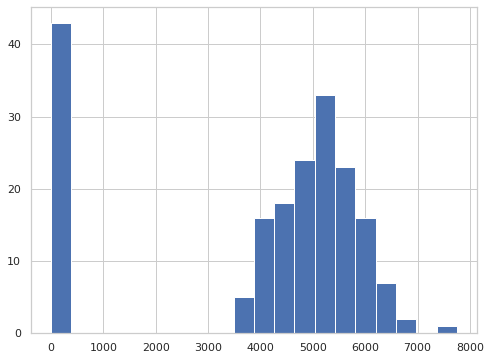

In [ ]:
CITY[0]["NU_NOTA_CH"].hist(bins = 20, figsize=(8, 6))

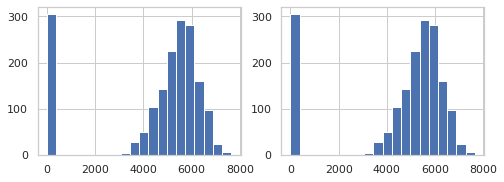

In [ ]:
plt.subplot(2, 2, 1)
CITY[1]["NU_NOTA_CH"].hist(bins = 20, figsize=(8, 6))

plt.subplot(2, 2, 2)
CITY[1]["NU_NOTA_CH"].hist(bins = 20, figsize=(8, 6))

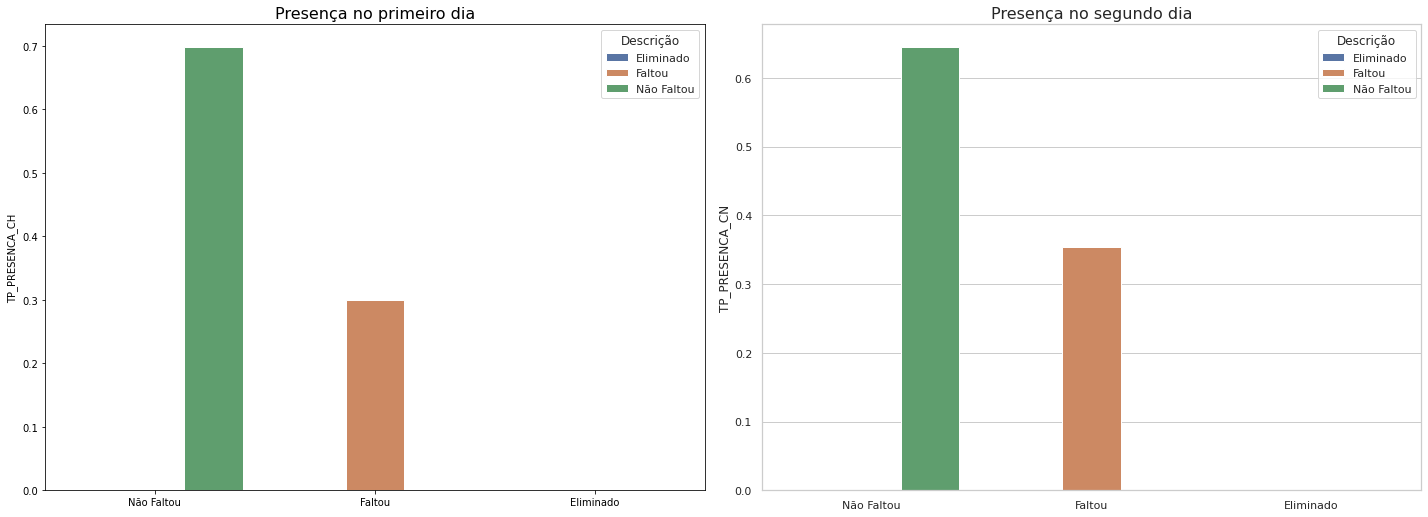

In [157]:
sem_carro = CITY[2].loc[CITY[2]['CARRO'] == 0]
nao_carro = pd.DataFrame(sem_carro['TP_PRESENCA_CN'].value_counts(normalize=True))
nao_carroH = pd.DataFrame(sem_carro['TP_PRESENCA_CH'].value_counts(normalize=True))


plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=nao_carroH, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=nao_carroH['TP_PRESENCA_CH'], hue='TP_PRESENCA_CH',
                 )
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no primeiro dia', fontsize = 16)

plt.subplot(2, 2, 2)
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=nao_carro, x=['Não Faltou' , 'Faltou', 'Eliminado'], y=nao_carro['TP_PRESENCA_CN'], hue='TP_PRESENCA_CN',
                 )
labels=['Eliminado', 'Faltou', 'Não Faltou']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Descrição")
plt.title('Presença no segundo dia', fontsize = 16)

plt.tight_layout()
plt.show()

In [ ]:
evasao_primeiro_segundo = CITY[2].query('TP_PRESENCA_LC == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_CN == 0 & TP_PRESENCA_MT == 0')

In [ ]:
municipio_diferente =  CITY[2].query('MUNICIPIO != LOCALPROVA')
municipio_evasao = evasao_primeiro_segundo.query('MUNICIPIO != LOCALPROVA')

In [ ]:
data1 = pd.Series({'MUNICIPIO IGUAL ': len(CITY[2]) - len(municipio_diferente), 'MUNICIPIO DIFERENTE' : len(municipio_diferente),
        'DIF_FALTANTES' : len(municipio_evasao)})

In [ ]:
ENEM0.Q025.value_counts()

B    756858
A    243142
Name: Q025, dtype: int64

In [ ]:
data1

MUNICIPIO IGUAL        27444
MUNICIPIO DIFERENTE     2335
DIF_FALTANTES             81
dtype: int64

In [ ]:
CITY[0]

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO
566832,2019,MOCOCA,35,SP,18,F,1,2,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MOCOCA,B,B,C,A,A,0
567254,2019,MOCOCA,35,SP,17,M,1,2,1,1,1,1,5411,6014,5593,5942,0,1.0,620.0,120.0,120.0,120.0,140.0,120.0,MOCOCA,B,B,G,A,B,1
567415,2019,MOCOCA,35,SP,17,F,3,2,1,1,1,1,3764,4195,4658,4365,1,1.0,580.0,120.0,120.0,120.0,120.0,100.0,MOCOCA,B,B,B,A,A,0
567422,2019,MOCOCA,35,SP,17,F,1,2,0,1,1,0,0,4505,4302,0,0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,MOCOCA,B,B,C,B,B,1
568976,2019,MOCOCA,35,SP,18,F,1,1,1,1,1,1,5111,5385,5859,7163,0,1.0,680.0,160.0,120.0,120.0,140.0,140.0,MOCOCA,C,C,D,B,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900259,2019,MOCOCA,35,SP,17,F,1,2,1,1,1,1,3858,4284,3835,4390,0,1.0,400.0,80.0,100.0,80.0,100.0,40.0,MOCOCA,F,B,F,B,B,0
900325,2019,MOCOCA,35,SP,18,M,1,2,1,1,1,1,5151,4421,5235,5205,1,1.0,600.0,120.0,180.0,120.0,80.0,100.0,MOCOCA,C,D,D,B,B,1
900525,2019,MOCOCA,35,SP,45,F,1,1,1,1,1,1,5262,5766,5420,5449,1,1.0,540.0,120.0,120.0,100.0,100.0,100.0,MOCOCA,B,B,C,B,B,1
900777,2019,MOCOCA,35,SP,18,F,1,1,1,1,1,1,6147,6684,6302,6756,0,1.0,980.0,180.0,200.0,200.0,200.0,200.0,MOCOCA,B,D,N,B,B,1


In [ ]:
df = pd.DataFrame([data1])
df = df.rename(index={0 : "2019"})
df

In [126]:
#criando os limites superiores das classes:
salario_minimo = 998.00
a = 43615.58 #salário do Ministro do Superior Tribunal Federal
b = 20 * salario_minimo #14.970,00
c = 10 * salario_minimo # 4.990,00
d = 4 * salario_minimo # 2.994,00
e = salario_minimo # 998,00

In [133]:
ENEM0

,NU_ANO,MUNICIPIO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_RENDA_FAMILIAR,TP_COR_RACA,TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,LOCALPROVA,Q003,Q004,Q006,Q024,Q025,CARRO,CLASSE_SOCIAL_FAMILIAR
0,2019,SANTAREM,15,PA,21,M,998.0,3,1,1,1,1,1,4729,4660,4973,3691,0,1.0,780.0,160.0,160.0,160.0,140.0,160.0,SANTAREM,A,A,B,B,A,0,E
1,2019,MAE DO RIO,15,PA,16,F,998.0,3,1,1,1,1,1,3589,4954,4823,4165,1,1.0,600.0,120.0,120.0,120.0,120.0,120.0,MAE DO RIO,A,A,B,A,A,0,E
2,2019,PARAGOMINAS,15,PA,18,F,1497.0,1,3,1,1,1,1,5742,5387,5826,5715,0,1.0,640.0,140.0,120.0,120.0,140.0,120.0,PARAGOMINAS,A,D,C,C,B,1,D
3,2019,SAO SEBASTIAO DA BOA VISTA,15,PA,23,M,1497.0,3,2,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAO SEBASTIAO DA BOA VISTA,A,B,C,A,A,0,D
4,2019,JURUTI,15,PA,23,M,1497.0,3,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JURUTI,A,A,C,A,A,1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019,FRANCA,35,SP,18,F,3992.0,1,1,1,1,1,1,4678,5803,5560,6008,1,1.0,560.0,140.0,140.0,120.0,120.0,40.0,FRANCA,D,D,G,A,B,1,D
999996,2019,SAO PAULO,35,SP,31,F,1996.0,1,1,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAO PAULO,F,F,D,A,B,0,D
999997,2019,SAO PAULO,35,SP,35,F,2994.0,1,1,0,2,2,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAO PAULO,A,B,F,B,B,1,D
999998,2019,ARACATUBA,35,SP,17,F,3992.0,1,2,1,1,1,1,4945,4950,5746,5946,1,1.0,680.0,160.0,120.0,160.0,120.0,120.0,ARACATUBA,D,B,G,A,B,1,D


In [130]:
#criando o rótulo das classes
classes = ['E', 'D', 'C', 'B', 'A']

#dividindo o limite superior das classes pelo valor por indivíduo médio numa família
media_pessoas_por_familia = 2.9
A = a/media_pessoas_por_familia
B = b/media_pessoas_por_familia
C = c/media_pessoas_por_familia
D = d/media_pessoas_por_familia
E = e/media_pessoas_por_familia
(A,B,C,D,E)

(15039.855172413794,
 6882.758620689656,
 3441.379310344828,
 1376.5517241379312,
 344.1379310344828)

In [132]:
#dividindo em classes, usando o pandas.cut
ENEM0['CLASSE_SOCIAL_FAMILIAR'] = pd.cut(ENEM0['NU_RENDA_FAMILIAR'],
                                         right=True,labels = classes, 
                                         bins=[0,e,d,c,b,a], include_lowest=True)

In [135]:
ENEM0.CLASSE_SOCIAL_FAMILIAR.value_counts()

D    2757751
E    1486625
C     549180
B     150963
A      55481
Name: CLASSE_SOCIAL_FAMILIAR, dtype: int64

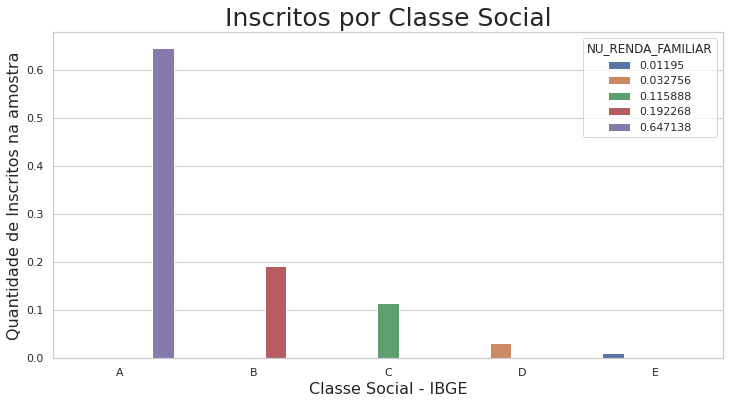

In [199]:
social = pd.DataFrame(ENEM['NU_RENDA_FAMILIAR'].value_counts(normalize=True).sort_index(ascending=False))
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=ENEM, x=['A' , 'B', 'C','D','E'], y=social['NU_RENDA_FAMILIAR'],
                 hue=social['NU_RENDA_FAMILIAR'], order=['A', 'B', 'C', 'D', 'E']               )
ax.set_title('Inscritos por Classe Social', fontsize=25)
ax.set_xlabel('Classe Social - IBGE', fontsize=16)
ax.set_ylabel('Quantidade de Inscritos na amostra', fontsize=16);

In [185]:
social = pd.DataFrame(ENEM0['CLASSE_SOCIAL_FAMILIAR'].value_counts(normalize=True).sort_index(ascending=False))
social

,CLASSE_SOCIAL_FAMILIAR
A,0.011096
B,0.030193
C,0.109836
D,0.551550
E,0.297325


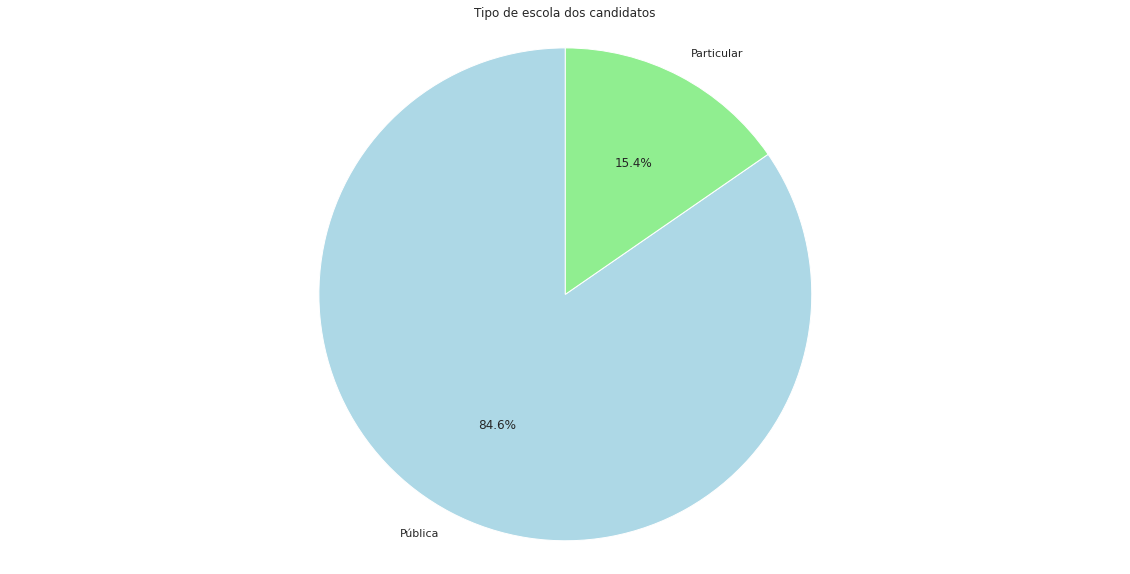

In [210]:
ESCOLA = ENEM0.query("TP_ESCOLA >1")
ensino1 = ESCOLA["TP_ESCOLA"].value_counts(normalize=True).index
ensino2 = ESCOLA["TP_ESCOLA"].value_counts(normalize=True).values

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(ensino2, labels=['Pública', 'Particular'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
ax1.axis('equal') 
plt.title("Tipo de escola dos candidatos")
plt.show()

In [213]:
ESCOLA.TP_ESCOLA.value_counts()

2    1202930
3     218613
Name: TP_ESCOLA, dtype: int64